## Präsenzübung: Das Millikan Experiment (keine Punkte)

### Imports

In [83]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # numerical
import scipy.constants as c
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting improved
from uncertainties import ufloat 
from uncertainties.umath import sqrt as usqrt

get_ev =lambda x: (np.frompyfunc(lambda y: y.nominal_value, 1, 1)(x))
get_std = lambda x: (np.frompyfunc(lambda y: y.std_dev, 1, 1)(x))
split = lambda x: [get_ev(x), get_std(x)]
get_weighted_mean = np.frompyfunc(lambda x,y: ufloat((x.n/x.s**2 + y.n/y.s**2) / (1/x.s**2 + 1/y.s**2) , sqrt(1/(1/x.s**2 + 1/y.s**2))), 2, 1)
nd_ufloat = np.frompyfunc(lambda x,y: ufloat(x,y), 2, 1)
sqrt = np.frompyfunc(lambda x: usqrt(x), 1, 1)

### Setup für die Plot Darstellung

In [2]:
plt.rcParams['figure.dpi'] = 150

sns.set_style("whitegrid")
sns.set_palette("colorblind")

### Daten lesen

In [3]:
csv_file_path = 'MillikanData.csv'

df = pd.read_csv(csv_file_path,
                 delimiter=';',
                 decimal=',',
                 na_values="None",
                 index_col=["ID", "Direction"])

Den dataframe darstellen, um zu verifizieren, dass das Laden funktioniert hat. Die Werte, die mit NaN dargestellt werden, sind nicht vorhanden und entsehen durch das Format der geladenen Tabelle.

In [4]:
df

Val0   Val1   Val2   Val3   Val4   Val5   Val6  Val7   Val8
ID Direction                                                              
1  U          11.15  11.48    NaN    NaN    NaN    NaN    NaN   NaN    NaN
   D           7.80   7.86    NaN    NaN    NaN    NaN    NaN   NaN    NaN
2  U           8.24   8.73   8.18    NaN    NaN    NaN    NaN   NaN    NaN
   D          17.52  16.91  16.54    NaN    NaN    NaN    NaN   NaN    NaN
3  U          18.24  16.75  16.58  17.09  17.03    NaN    NaN   NaN    NaN
   D           7.03   6.59   6.75   6.81   6.81    NaN    NaN   NaN    NaN
4  U          18.18  18.13  18.62  19.34  17.63    NaN    NaN   NaN    NaN
   D           6.64   6.70   6.75   6.75   6.59    NaN    NaN   NaN    NaN
5  U           3.02   3.02   2.91   3.02   3.02   2.96   2.91  3.02    NaN
   D           4.18   4.39   4.40   4.39   4.34   4.39   4.17  4.18    NaN
6  U           7.64   7.74   7.80   7.31   7.36   7.75   8.02   NaN    NaN
   D           8.67   8.68   8.73   8.57   8.79   8.84   8.40   NaN    NaN
7  U           7.47   7.36   7.08   7.58   7.58   7.41   7.25   NaN    NaN
   D           9.45   9.01   8.90   9.50   9.50   9.45   9.06   NaN    NaN
8  U           4.78   4.61   4.83   4.77   4.62   4.73   4.56   NaN    NaN
   D          11.92  12.90  11.98  12.74  12.91  12.36  11.65   NaN    NaN
9  U           3.14   2.97   2.96   2.91   2.96   3.07   2.91   NaN    NaN
   D           5.11   5.32   5.06   5.16   5.06   5.27   5.16   NaN    NaN
10 U           6.76   6.67   6.87   6.54   6.42   6.59   6.37  6.59   6.70
   D          10.10   9.89   9.67   9.61   9.99  10.11  10.11  9.39  10.27

### Konstanten definieren

In [14]:
rho_oil     = 900       # kg/m^3
visk_air    = 18.1e-6   # N*s/m^2
d           = 0.006     # m
U           = 600       # V
g           = 9.81      # m/s^2
s           = 0.0006    # m

$q = c(v_1 + v_2)\sqrt{v_1}\\
c = \frac{6\pi\eta^{3/2}d}{U}\sqrt{\frac{9}{2\rho g}}$

In [46]:
def calculate_charge(upspeed, downspeed):
    # Implementen Sie hier die Berechnung der Ladung
    c = 6*np.pi*visk_air**(3/2) * d / U * np.sqrt(9/(2*rho_oil*g))
    return c * (downspeed + upspeed) * sqrt(downspeed)

In [47]:
# Kopieren wir die Tabelle, um die alten Daten nicht zu verändern

df2 = df.copy()

Für die Berechnung wird noch die mittlere Laufzeit nach oben und unten, deren Standardabweichung, die Geschwindigkeit und die Standardabweichung der Geschwindigkeit benötigt. \
Sie können in dem pandas DataFrame einfach neue Spalten hinzufügen, indem Sie diese mit Namen einer Spalte zuweisen, beispielsweise so

```
df2["NewColumn"] = df2["Val0"] + df2["Val1"]
```

In [48]:
# Berechnen Sie die mittlere Laufzeit pro Reihe, deren Standardabweichung, die sich daraus ergebene Geschwindigkeit und deren Standardabweichung

df2['MeanTime'] = df2.mean(axis=1)
df2["StdTime"] = df2.std(axis=1, ddof=1)
df2["Speed"] = s / df2['MeanTime'] 
df2["SpeedStd"] = s / df2['MeanTime']**2 * df2['StdTime']

In [49]:
df2

Val0   Val1   Val2   Val3   Val4   Val5   Val6  Val7   Val8  \
ID Direction                                                                 
1  U          11.15  11.48    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
   D           7.80   7.86    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2  U           8.24   8.73   8.18    NaN    NaN    NaN    NaN   NaN    NaN   
   D          17.52  16.91  16.54    NaN    NaN    NaN    NaN   NaN    NaN   
3  U          18.24  16.75  16.58  17.09  17.03    NaN    NaN   NaN    NaN   
   D           7.03   6.59   6.75   6.81   6.81    NaN    NaN   NaN    NaN   
4  U          18.18  18.13  18.62  19.34  17.63    NaN    NaN   NaN    NaN   
   D           6.64   6.70   6.75   6.75   6.59    NaN    NaN   NaN    NaN   
5  U           3.02   3.02   2.91   3.02   3.02   2.96   2.91  3.02    NaN   
   D           4.18   4.39   4.40   4.39   4.34   4.39   4.17  4.18    NaN   
6  U           7.64   7.74   7.80   7.31   7.36   7.75   8.02   NaN    NaN   
   D           8.67   8.68   8.73   8.57   8.79   8.84   8.40   NaN    NaN   
7  U           7.47   7.36   7.08   7.58   7.58   7.41   7.25   NaN    NaN   
   D           9.45   9.01   8.90   9.50   9.50   9.45   9.06   NaN    NaN   
8  U           4.78   4.61   4.83   4.77   4.62   4.73   4.56   NaN    NaN   
   D          11.92  12.90  11.98  12.74  12.91  12.36  11.65   NaN    NaN   
9  U           3.14   2.97   2.96   2.91   2.96   3.07   2.91   NaN    NaN   
   D           5.11   5.32   5.06   5.16   5.06   5.27   5.16   NaN    NaN   
10 U           6.76   6.67   6.87   6.54   6.42   6.59   6.37  6.59   6.70   
   D          10.10   9.89   9.67   9.61   9.99  10.11  10.11  9.39  10.27   

               MeanTime   StdTime     Speed      SpeedStd  
ID Direction                                               
1  U          11.315000  0.165000  0.000053  7.732609e-07  
   D           7.830000  0.030000  0.000077  2.935952e-07  
2  U           8.383333  0.246351  0.000072  2.103160e-06  
   D          16.990000  0.404063  0.000035  8.398723e-07  
3  U          17.138000  0.581426  0.000035  1.187751e-06  
   D           6.798000  0.141195  0.000088  1.833192e-06  
4  U          18.380000  0.573446  0.000033  1.018480e-06  
   D           6.686000  0.062801  0.000090  8.429212e-07  
5  U           2.985000  0.047434  0.000201  3.194139e-06  
   D           4.305000  0.100871  0.000139  3.265669e-06  
6  U           7.660000  0.231948  0.000078  2.371837e-06  
   D           8.668571  0.136217  0.000069  1.087647e-06  
7  U           7.390000  0.167161  0.000081  1.836529e-06  
   D           9.267143  0.244699  0.000065  1.709588e-06  
8  U           4.700000  0.095019  0.000128  2.580864e-06  
   D          12.351429  0.475107  0.000049  1.868565e-06  
9  U           2.988571  0.079179  0.000201  5.319080e-06  
   D           5.162857  0.092692  0.000116  2.086479e-06  
10 U           6.612222  0.149501  0.000091  2.051640e-06  
   D           9.904444  0.272890  0.000061  1.669088e-06

Mir der `iloc` Funktion können auf die einzelnen Reihen des DatenFrames zugegriffen werden. Greift man auf jede zweite Reihe zu, erhält man nur die `up` und `down` Reihen.

In [60]:
upspeeds       = df2["Speed"].iloc[::2]
upspeeds_std   = df2["SpeedStd"].iloc[::2]
downspeeds     = df2["Speed"].iloc[1::2]
downspeeds_std = df2["SpeedStd"].iloc[1::2]

u_upspeeds = np.array(nd_ufloat(upspeeds, upspeeds_std))
u_downspeeds = np.array(nd_ufloat(downspeeds, downspeeds_std))

Berechnen Sie nun die freien Ladungen für die gemessenen Werte:

In [61]:
charges_free = calculate_charge(u_upspeeds, u_downspeeds)

In [62]:
for i, charge_free in enumerate(charges_free):
    print(f"{i}: {charge_free:0.2e}")

0: (3.72+/-0.03)e-19
1: (2.08+/-0.06)e-19
2: (3.80+/-0.10)e-19
3: (3.80+/-0.05)e-19
4: (1.32+/-0.03)e-18
5: (4.02+/-0.09)e-19
6: (3.85+/-0.11)e-19
7: (4.03+/-0.13)e-19
8: (1.12+/-0.03)e-18
9: (3.86+/-0.11)e-19


Plotten Sie die ermittelte Ladung hier als Funktion der Messreihe.

<ErrorbarContainer object of 3 artists>

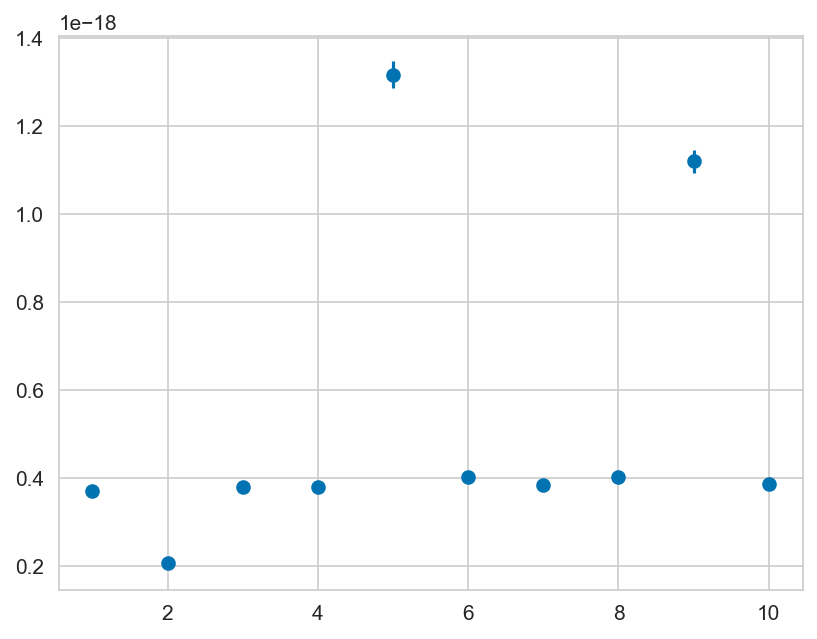

In [77]:
i = np.arange(1, len(charges_free)+1)
plt.errorbar(i, *split(charges_free), fmt="o")

In [99]:
n = [2,1,2,2,7,2,2,2,6,2]
q = get_weighted_mean.reduce(charges_free / n) 
print(q)
print(1-q/c.elementary_charge)

(1.890+/-0.010)e-19
-0.180+/-0.006


Diskutieren Sie die Abweichungen. Welche systematischen Fehler können eine Rolle spielen?